<a href="https://colab.research.google.com/github/VygovskayaNatalya/Lesson1_Python/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%B1%D0%BE%D0%BB%D0%B5%D0%B7%D0%BD%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

**Задача: «Прогнозирование риска развития
сердечно-сосудистого заболевания пациента»**

Ссылка: https://drive.google.com/drive/folders/1xndXPEQkg7jlX28-seIPn2b31JMaRQZ6?usp=sharing

Более 80% смертельных исходов в Российской Федерации связано с
заболеваниями сердечно-сосудистой системы. Клинические методы
диагностики не позволяют определять предикторы этих проблем без
посещения медицинской организации и взятия анализов. В этой связи
особую актуальность приобретает разработка интеллектуальной системы
прогнозирования риска развития заболеваний с использованием
исторических данных, позволяющей оценить риски критических нарушений
в условиях повседневной жизни, без визита к врачу.
Распространенность болезней системы кровообращения
преимущественно зависит от причин, главным образом, связанных с
особенностями образа жизни, профилактическое воздействие на который
может замедлить развитие заболеваний как до, так и после появления
клинических симптомов. К настоящему времени выделяют более 300
факторов риска, однако, в первую очередь, сегодня используют семь
факторов, вносящих основной вклад в преждевременную смертность:
артериальная гипертензия, гиперхолестеринемия, курение, недостаточное
потребление фруктов и овощей, избыточная масса тела, избыточное
потребление алкоголя, гиподинамия. Это, так называемые, традиционные
факторы. Если же традиционным факторам уделяется огромное внимание,
то нетрадиционным посвящены всего лишь отдельные исследования.
Условие задачи

Задача — разработать модель машинного обучения, цель которой —
предсказание наличия сердечно-сосудистых заболеваний. Данные
содержат опрос реальных пациентов и их диагнозы, включая такие
непрямые показатели, как образование, этнос, вид работы и многие другие.
В рамках чемпионата вам необходимо классифицировать
наличие/отсутствие у пациента следующих заболеваний:

● Артериальная гипертензия;

● Острое нарушение мозгового кровообращения;

● Стенокардия, ИБС, инфаркт миокарда;

● Сердечная недостаточность.

Входные значения train.csv — содержит в себе 1100 столбцов для обучения
модели

Метрика

В качестве метрики выступает Recall:

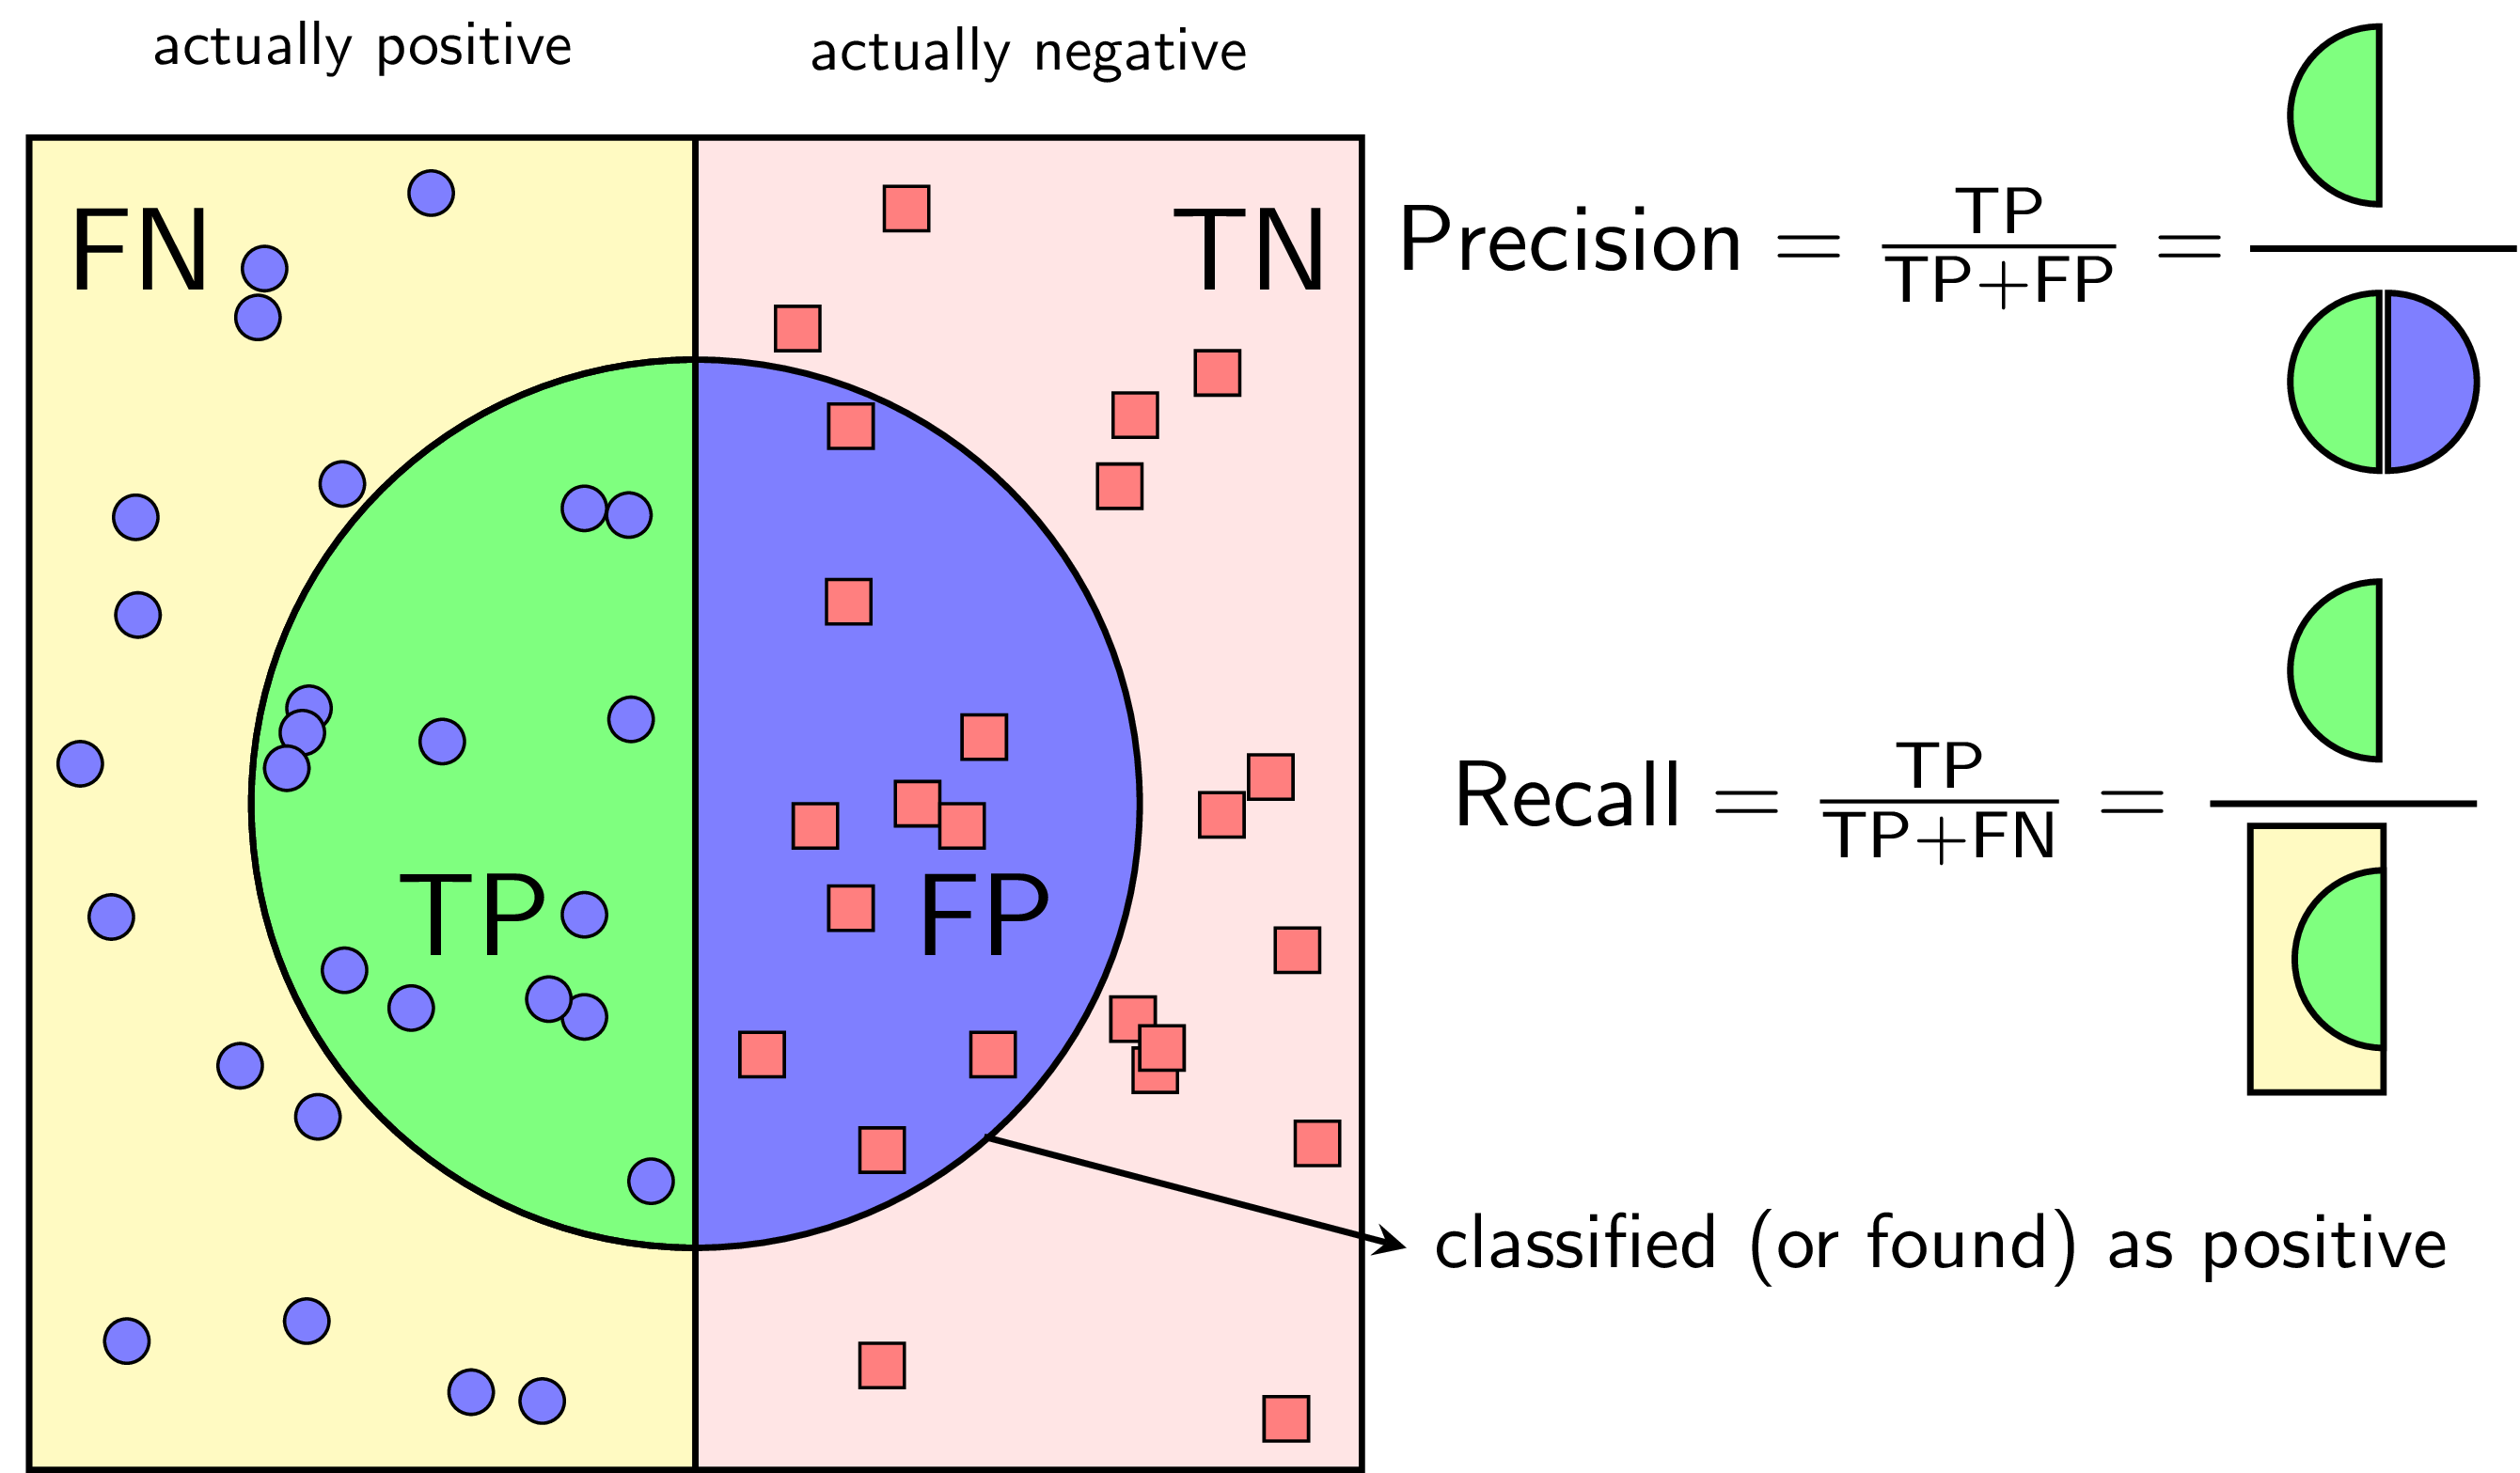

Так как конечная задача преполагает мультиклассовое предсказание,
то для каждой категории будет рассчитана своя метрика, которая будет
усреднена. Такой полученный усредненный Recall для всего
тренировочного датасета и будет является оценкой точности решения
участника.

# Библиотеки

In [ ]:
# Импортирование необходимых библиотек
import numpy as np
import pandas as pd
import os
import gc
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras.metrics import Recall
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Импортирование и установка необходимых библиотек и модулей
# Для работы с данными и визуализацией
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns

# Для предобработки данных
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Для создания и обучения нейронных сетей
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import Recall
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Dropout, concatenate
from tensorflow.keras.optimizers import Adam

In [ ]:
# Для работы с Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Загружаем данные

БАЗА: https://drive.google.com/file/d/1sLonjWzOBbHO47ag3gE-0edFxQWqZanw/view?usp=sharing

In [ ]:
# Указываем путь к файлу с данными обучения
train_path = '/content/drive/MyDrive/AI/Work/OL/train.csv'

# Загружаем данные обучения из CSV файла в DataFrame
dftrain = pd.read_csv(train_path)

# Удаляем столбец 'ID_y', который не нужен для дальнейшего анализа
del dftrain['ID_y']

In [ ]:
# смотрим DataFrame
dftrain

,ID,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,...,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
0,54-102-358-02,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,...,22:00:00,06:00:00,0,0,0,0,0,0,0,0
1,54-103-101-01,Ж,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,...,00:00:00,04:00:00,1,0,0,1,1,0,0,0
2,54-501-026-03,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,...,23:00:00,07:00:00,0,0,0,0,0,0,0,0
3,54-501-094-02,М,в браке в настоящее время,европейская,Русские,Атеист / агностик,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,...,23:00:00,07:00:00,0,0,0,1,0,0,0,0
4,54-503-022-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,операторы и монтажники установок и машинного о...,0,0,...,23:00:00,06:00:00,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,54-103-006-01,М,в браке в настоящее время,европейская,Русские,Христианство,4 - профессиональное училище,операторы и монтажники установок и машинного о...,1,0,...,22:00:00,06:00:00,0,0,0,0,0,0,0,0
951,54-701-039-01,Ж,вдовец / вдова,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,...,21:30:00,07:15:00,0,0,0,0,0,0,0,0
952,54-002-014-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,служащие,0,1,...,22:30:00,08:00:00,1,0,0,1,0,1,0,0
953,54-501-022-01,Ж,в браке в настоящее время,европейская,Русские,Атеист / агностик,5 - ВУЗ,"представители законодат. органов власти,...",1,0,...,23:00:00,08:30:00,0,1,0,0,0,0,0,0


In [ ]:
# Посмотрим уникальные данные по столбцам
def printUniqueColumns(df_):
  for col in df_.columns:
    if col == 'ID': continue # Пропускаем столбец 'ID'
    print('---------- Столбец ', col)
    print(df_[col].unique(), '\n')


In [ ]:
printUniqueColumns(dftrain)

---------- Столбец  Пол
['М' 'Ж' nan] 

---------- Столбец  Семья
['в браке в настоящее время' 'в разводе'
 'гражданский брак / проживание с партнером' 'вдовец / вдова'
 'никогда не был(а) в браке'
 'раздельное проживание (официально не разведены)'] 

---------- Столбец  Этнос
['европейская'
 'другая азиатская (Корея, Малайзия, Таиланд, Вьетнам, Казахстан, Киргизия, Туркмения, Узбекистан, Таджикистан)'
 'прочее (любая иная этно-расовая группа, не представленная выше)'] 

---------- Столбец  Национальность
['Русские' 'Азербайджанцы' 'Татары' 'Немцы' 'Эстонцы'
 'Другие национальности' 'Молдаване' 'Украинцы' 'Чуваши' 'Мордва'
 'Киргизы' 'Казахи' 'Армяне' 'Белорусы' 'Таджики' 'Башкиры' 'Евреи'
 'Буряты'] 

---------- Столбец  Религия
['Христианство' 'Атеист / агностик' 'Ислам' 'Нет'] 

---------- Столбец  Образование
['3 - средняя школа / закон.среднее / выше среднего' '5 - ВУЗ'
 '2 - начальная школа' '4 - профессиональное училище'] 

---------- Столбец  Профессия
['низкоквалифицированные 

In [ ]:
#дополнительная проверка на отсутствующие данные в датасете
dftrain.isna().sum()

ID                                         0
Пол                                        1
Семья                                      0
Этнос                                      0
Национальность                             0
Религия                                    0
Образование                                0
Профессия                                  0
Вы работаете?                              0
Выход на пенсию                            0
Прекращение работы по болезни              0
Сахарный диабет                            0
Гепатит                                    0
Онкология                                  0
Хроническое заболевание легких             0
Бронжиальная астма                         0
Туберкулез легких                          0
ВИЧ/СПИД                                   0
Регулярный прим лекарственных средств      0
Травмы за год                              0
Переломы                                   0
Статус Курения                             0
Возраст ку

# Предобработка данных

**Нормализация**

Нормализация данных является важной предварительной обработкой данных в задачах машинного обучения. Ее целью является приведение значений признаков (переменных) к определенному диапазону или распределению. Вот несколько причин, по которым нормализация данных важна для машинного обучения:

1. **Улучшение сходимости алгоритмов оптимизации**: Многие алгоритмы машинного обучения, такие как градиентный спуск, более эффективно работают, если данные нормализованы. Это помогает избежать проблемы "застревания" в локальных минимумах или долгой сходимости.

2. **Повышение производительности модели**: Нормализация может помочь модели быстрее сходиться к оптимальным весам, что в свою очередь улучшает скорость обучения и/или качество модели.

3. **Уменьшение чувствительности к масштабу признаков**: Некоторые алгоритмы, такие как метод k-ближайших соседей (k-NN) или методы на основе расстояний, могут быть сильно зависимыми от масштаба признаков. Нормализация позволяет уравновесить влияние различных признаков на результат.

4. **Повышение стабильности и устойчивости**: Нормализация помогает сделать алгоритмы более стабильными и устойчивыми к изменениям в данных.

5. **Поддержание численной стабильности**: В численных вычислениях на больших данных могут возникнуть проблемы с точностью из-за больших или маленьких значений признаков. Нормализация может помочь уменьшить вероятность подобных проблем.

6. **Работа нейронных сетей**: В нейронных сетях нормализация, такая как Batch Normalization, может способствовать более стабильному обучению, ускорению сходимости и предотвращению проблем, таких как взрывающиеся градиенты.

Существует несколько способов нормализации данных, такие как мин-макс нормализация, стандартизация (z-score нормализация), логарифмическая или квадратный корень нормализация, и другие. Выбор метода нормализации может зависеть от конкретных характеристик данных и алгоритмов, которые вы планируете использовать.

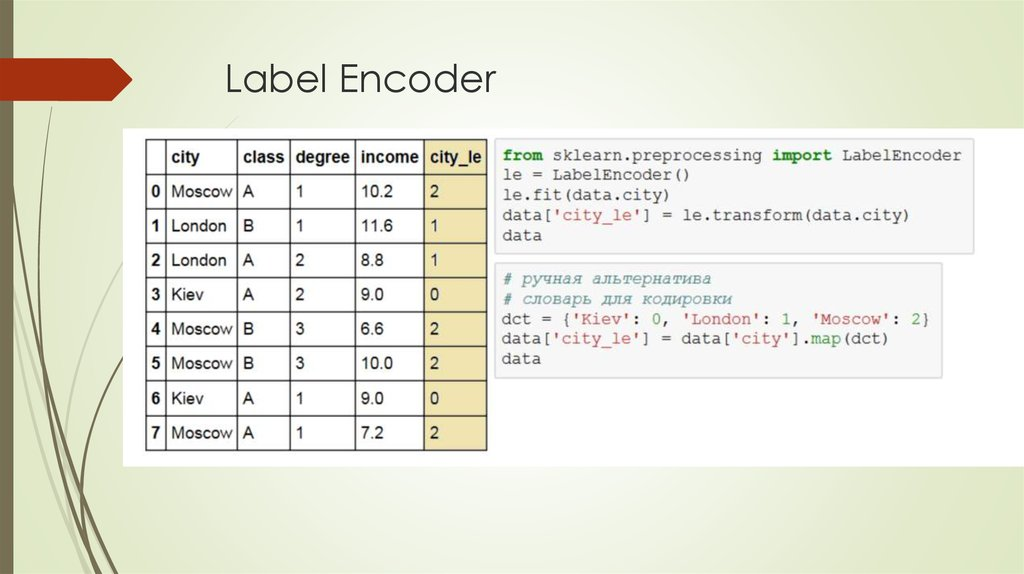

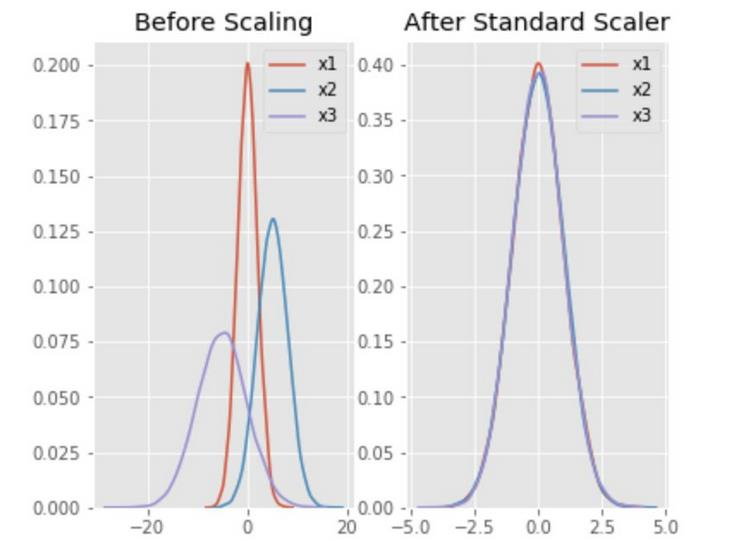

In [ ]:
# Определяем функцию для получения словаря из столбца с использованием LabelEncoder
def get_labelEncoder_dict(df_: pd.DataFrame, col: str):
    # Создаем объект LabelEncoder
    label_encoder = LabelEncoder()

    # Применяем LabelEncoder к столбцу и заменяем значения на закодированные
    df_[col] = label_encoder.fit_transform(df_[[col]])

In [ ]:
# Определяем функцию для получения словаря с использованием StandardScaler для числовых значений
def get_labelSTD_dictNUM(df_, col):
    # Заполняем отсутствующие значения числом 0
    df_[col].fillna(0, inplace=True)

    # Создаем объект MinMaxScaler
    scaler = MinMaxScaler()

    # Преобразуем данные в массив и меняем их масштаб на диапазон [0, 1]
    data = np.array(df_[col].values)
    pillar = data.reshape(-1, 1)
    pillar = scaler.fit_transform(pillar)

    # Преобразуем обратно в одномерный массив
    newdata = np.squeeze(pillar)

    # Заменяем значения в указанной колонке на новые значения с измененным масштабом
    df_[col] = pillar


In [ ]:
# Определяем функцию для получения словаря из определенных столбцов с использованием LabelEncoder и StandardScaler
def getDictCodeColums(df_, CodeColums, ScalerCol):
    # Применяем get_labelEncoder_dict к каждому столбцу из списка CodeColums
    for colu in CodeColums:
        get_labelEncoder_dict(df_, colu)

    # Применяем get_labelSTD_dictNUM к каждому столбцу из списка ScalerCol
    for colu in ScalerCol:
        get_labelSTD_dictNUM(df_, colu)

    # Возвращаем обновленный DataFrame
    return df_

In [ ]:
# Список Колонок для labelEncoder
CodeColums = ["Пол", 'Семья', 'Этнос', 'Национальность', 'Религия', 'Образование', 'Профессия', 'Статус Курения', 'Частота пасс кур', 'Алкоголь', 'Время засыпания', 'Время пробуждения']

In [ ]:
# Список Колонок для StandardScaler
ScalerCol = ['Возраст алког', 'Сигарет в день','Возраст курения']

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Применяем функцию getDictCodeColums для кодирования и масштабирования столбцов в DataFrame dftrain
# используя списки CodeColums и ScalerCol
dfScaler = getDictCodeColums(dftrain, CodeColums, ScalerCol)

# Возвращаем обновленный DataFrame dfScaler
dfScaler

,ID,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,...,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
0,54-102-358-02,1,0,1,12,3,1,4,1,0,...,15,11,0,0,0,0,0,0,0,0
1,54-103-101-01,0,1,1,12,3,3,2,0,0,...,0,3,1,0,0,1,1,0,0,0
2,54-501-026-03,0,0,1,12,3,3,2,0,0,...,18,20,0,0,0,0,0,0,0,0
3,54-501-094-02,1,0,1,12,0,1,4,1,0,...,18,20,0,0,0,1,0,0,0,0
4,54-503-022-01,0,0,1,12,3,1,5,0,0,...,18,11,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,54-103-006-01,1,0,1,12,3,2,5,1,0,...,15,11,0,0,0,0,0,0,0,0
951,54-701-039-01,0,2,1,12,3,1,4,1,0,...,14,22,0,0,0,0,0,0,0,0
952,54-002-014-01,0,0,1,12,3,1,9,0,1,...,17,25,1,0,0,1,0,1,0,0
953,54-501-022-01,0,0,1,12,0,3,6,1,0,...,18,27,0,1,0,0,0,0,0,0


In [ ]:
# Посмотрим уникальные данные по столбцам
printUniqueColumns(dfScaler)

---------- Столбец  Пол
[1 0 2] 

---------- Столбец  Семья
[0 1 3 2 4 5] 

---------- Столбец  Этнос
[1 0 2] 

---------- Столбец  Национальность
[12  0 14 11 17  5  9 15 16 10  8  7  1  3 13  2  6  4] 

---------- Столбец  Религия
[3 0 1 2] 

---------- Столбец  Образование
[1 3 0 2] 

---------- Столбец  Профессия
[ 4  2  5  9  7  6 10  0  3  8  1] 

---------- Столбец  Вы работаете?
[1 0] 

---------- Столбец  Выход на пенсию
[0 1] 

---------- Столбец  Прекращение работы по болезни
[0 1] 

---------- Столбец  Сахарный диабет
[0 1] 

---------- Столбец  Гепатит
[0 1] 

---------- Столбец  Онкология
[0 1] 

---------- Столбец  Хроническое заболевание легких
[0 1] 

---------- Столбец  Бронжиальная астма
[0 1] 

---------- Столбец  Туберкулез легких 
[0 1] 

---------- Столбец  ВИЧ/СПИД
[0 1] 

---------- Столбец  Регулярный прим лекарственных средств
[0 1] 

---------- Столбец  Травмы за год
[0 1] 

---------- Столбец  Переломы
[0 1] 

---------- Столбец  Статус Курения
[1 2 0] 

--

# Исследование датасета

In [ ]:
# Вычисляем квантили (перцентили) для значений в DataFrame dfScaler
# на уровнях 0.25, 0.50 (медиана), 0.75, 0.95 и 1.0 (максимальное значение)
quantiles = dfScaler.quantile([0.25, 0.50, 0.75, 0.95, 1.0])
quantiles


,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,...,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
0.25,0.0,0.0,1.0,12.0,3.0,2.0,2.0,0.0,0.0,0.0,...,4.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.50,0.0,0.0,1.0,12.0,3.0,2.0,5.0,1.0,0.0,0.0,...,15.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.75,1.0,2.0,1.0,12.0,3.0,3.0,8.0,1.0,1.0,0.0,...,18.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.95,1.0,3.0,1.0,12.0,3.0,3.0,10.0,1.0,1.0,0.0,...,19.0,28.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1.00,2.0,5.0,2.0,17.0,3.0,3.0,10.0,1.0,1.0,1.0,...,21.0,33.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# Выводим описательную статистику для данных в DataFrame dfScaler
# Это включает среднее, стандартное отклонение, минимум, максимум и квантили
df_summary = dfScaler.describe()
df_summary


,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,...,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
count,955.000000,955.00000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,...,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,0.302618,0.86911,0.989529,11.917277,2.636649,2.123560,5.037696,0.523560,0.335079,0.048168,...,11.539267,17.739267,0.226178,0.068063,0.023037,0.467016,0.042932,0.122513,0.100524,0.090052
std,0.461907,1.22202,0.158264,1.273198,0.907064,0.729306,3.088941,0.499706,0.472265,0.214232,...,7.508715,7.334339,0.418575,0.251986,0.150098,0.499172,0.202810,0.328049,0.300854,0.286407
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,1.000000,12.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,4.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,1.000000,12.000000,3.000000,2.000000,5.000000,1.000000,0.000000,0.000000,...,15.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.00000,1.000000,12.000000,3.000000,3.000000,8.000000,1.000000,1.000000,0.000000,...,18.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,5.00000,2.000000,17.000000,3.000000,3.000000,10.000000,1.000000,1.000000,1.000000,...,21.000000,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


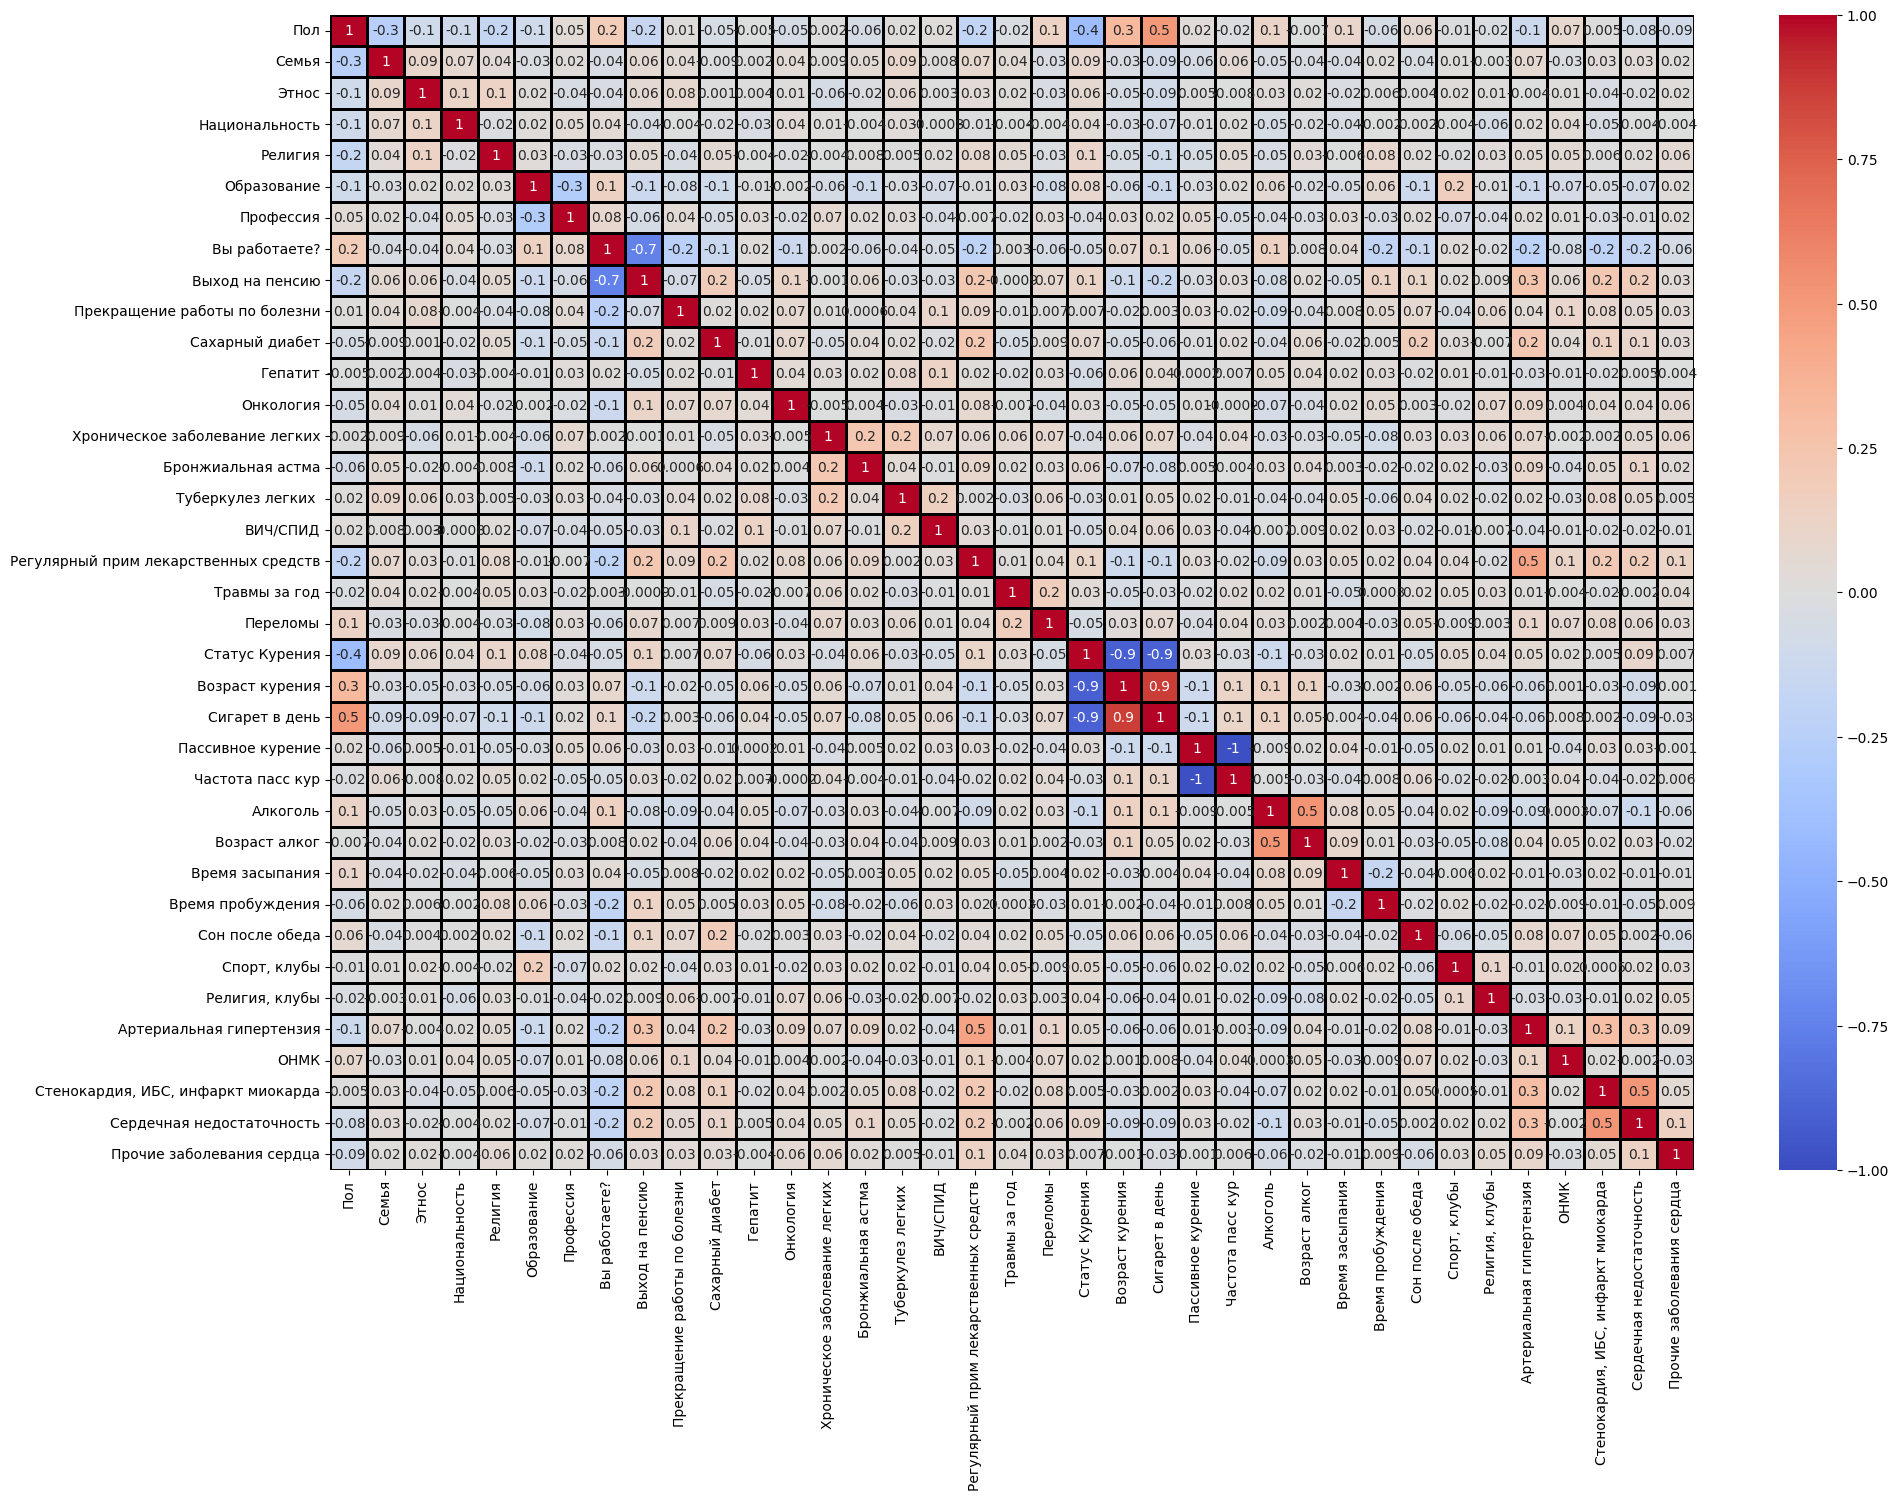

In [ ]:
# Вычисляем попарную корреляцию между элементами в DataFrame dfScaler с использованием коэффициента Спирмена
corr_matrix = dfScaler.corr('spearman')

# Создаем тепловую карту для визуализации корреляционной матрицы
plt.figure(figsize=(22, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot=True, fmt='.1g')

# Отображаем тепловую карту
plt.show()


# Формируем X и Y

In [ ]:
# Выводим количество столбцов в DataFrame dfScaler
print(len(dfScaler.columns))

# Выводим список названий столбцов в DataFrame dfScaler
df_columns = dfScaler.columns
df_columns


38


Index(['ID', 'Пол', 'Семья', 'Этнос', 'Национальность', 'Религия',
       'Образование', 'Профессия', 'Вы работаете?', 'Выход на пенсию',
       'Прекращение работы по болезни', 'Сахарный диабет', 'Гепатит',
       'Онкология', 'Хроническое заболевание легких', 'Бронжиальная астма',
       'Туберкулез легких ', 'ВИЧ/СПИД',
       'Регулярный прим лекарственных средств', 'Травмы за год', 'Переломы',
       'Статус Курения', 'Возраст курения', 'Сигарет в день',
       'Пассивное курение', 'Частота пасс кур', 'Алкоголь', 'Возраст алког',
       'Время засыпания', 'Время пробуждения', 'Сон после обеда',
       'Спорт, клубы', 'Религия, клубы', 'Артериальная гипертензия', 'ОНМК',
       'Стенокардия, ИБС, инфаркт миокарда', 'Сердечная недостаточность',
       'Прочие заболевания сердца'],
      dtype='object')

In [ ]:
# Выбираем столбцы для использования в обучении
# Исключаем первый и последние пять столбцов из списка столбцов DataFrame dfScaler
colX = list(dfScaler.columns[1:-5])

# Выводим список выбранных столбцов для обучения
print(colX)


['Пол', 'Семья', 'Этнос', 'Национальность', 'Религия', 'Образование', 'Профессия', 'Вы работаете?', 'Выход на пенсию', 'Прекращение работы по болезни', 'Сахарный диабет', 'Гепатит', 'Онкология', 'Хроническое заболевание легких', 'Бронжиальная астма', 'Туберкулез легких ', 'ВИЧ/СПИД', 'Регулярный прим лекарственных средств', 'Травмы за год', 'Переломы', 'Статус Курения', 'Возраст курения', 'Сигарет в день', 'Пассивное курение', 'Частота пасс кур', 'Алкоголь', 'Возраст алког', 'Время засыпания', 'Время пробуждения', 'Сон после обеда', 'Спорт, клубы', 'Религия, клубы']


In [ ]:
# Выводим dfScaler
dfScaler[colX]

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,...,Сигарет в день,Пассивное курение,Частота пасс кур,Алкоголь,Возраст алког,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы"
0,1,0,1,12,3,1,4,1,0,0,...,0.333333,0,5,2,0.285714,15,11,0,0,0
1,0,1,1,12,3,3,2,0,0,0,...,0.000000,0,5,0,0.000000,0,3,1,0,0
2,0,0,1,12,3,3,2,0,0,0,...,0.000000,1,0,2,0.269841,18,20,0,0,0
3,1,0,1,12,0,1,4,1,0,0,...,0.166667,1,2,2,0.206349,18,20,0,0,0
4,0,0,1,12,3,1,5,0,0,1,...,0.000000,1,4,2,0.253968,18,11,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,1,0,1,12,3,2,5,1,0,0,...,0.333333,0,5,2,0.285714,15,11,0,0,0
951,0,2,1,12,3,1,4,1,0,0,...,0.166667,0,5,1,0.412698,14,22,0,0,0
952,0,0,1,12,3,1,9,0,1,0,...,0.166667,0,5,2,0.317460,17,25,1,0,0
953,0,0,1,12,0,3,6,1,0,0,...,0.000000,0,5,2,0.333333,18,27,0,1,0


In [ ]:
# Извлекаем значения выбранных столбцов в массив xAll
xAll = dfScaler[colX].values

# Выводим количество столбцов в массиве xAll (признаков)
print('Количество столбцов:', len(xAll[0]))

# Выводим тип данных переменной xAll
print('Тип данных:', type(xAll))

# Выводим массив xAll
xAll


Количество столбцов: 32
Тип данных: <class 'numpy.ndarray'>


array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 0., 0.]])

In [ ]:
# Выбираем столбцы для целевых переменных Y (выходных данных)
# Извлекаем последние пять столбцов из DataFrame dfScaler
colY = list(dfScaler.columns[-5:])

# Выводим список выбранных столбцов для целевых переменных Y
print('Столбцы для Y:', colY)

# Извлекаем значения целевых переменных Y (последние пять столбцов) в массив yAll
yAll = dfScaler.iloc[:, -5:].values

# Выводим количество столбцов в массиве yAll (целевых переменных)
print('Количество столбцов:', len(yAll[0]))

# Выводим тип данных переменной yAll
print('Тип данных:', type(yAll))

# Выводим массив yAll
yAll


Столбцы для Y: ['Артериальная гипертензия', 'ОНМК', 'Стенокардия, ИБС, инфаркт миокарда', 'Сердечная недостаточность', 'Прочие заболевания сердца']
Количество столбцов: 5
Тип данных: <class 'numpy.ndarray'>


array([[0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [ ]:
# Разбиваем наборы данных на обучающие и валидационные выборки
# xAll - признаки (входные данные), yAll - целевые переменные (выходные данные)

# Используем функцию train_test_split для разбиения на обучающую и валидационную выборки
# test_size=0.1 означает, что 10% данных будут выделены для валидации
# shuffle=True означает, что данные будут перемешаны перед разбиением

x_train, x_val, y_train, y_val = train_test_split(xAll,
                                                  yAll,
                                                  test_size=0.1,
                                                  shuffle=True)

# Выводим размерности обучающих и валидационных наборов
print('Размерность x_train:', x_train.shape)
print('Размерность y_train:', y_train.shape)
print('Размерность x_val:', x_val.shape)
print('Размерность y_val:', y_val.shape)


Размерность x_train: (859, 32)
Размерность y_train: (859, 5)
Размерность x_val: (96, 32)
Размерность y_val: (96, 5)


# Нейронная сеть

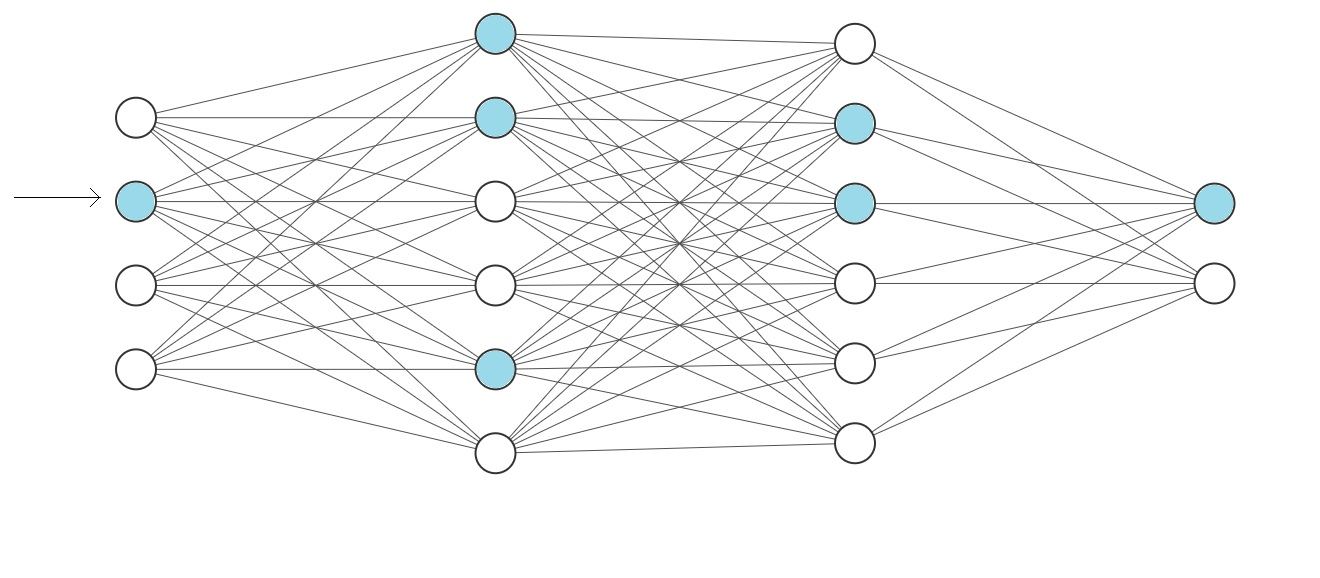

In [ ]:
def pltFigureLoss(history_):
  plt.figure(1, figsize=(18, 4))

  plt.plot(history_.history['loss'],
         label='Ошибка на обучающем наборе')
  plt.plot(history_.history['val_loss'],
         label=f'Ошибка на проверочном наборе, {round(history_.history["val_loss"][-1], 5)}')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.grid()
  plt.show()

def pltFigureRecall(history_):
  plt.figure(1, figsize=(18, 4))

  plt.plot(history_.history['recall'],
         label='recall на обучающем наборе')
  plt.plot(history_.history['val_recall'],
         label=f'recall на проверочном наборе, {round(history_.history["val_recall"][-1], 5)}')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Recall')
  plt.legend()
  plt.grid()
  plt.show()

def pltFigureAccur(history_):
  plt.figure(1, figsize=(18, 4))

  plt.plot(history_.history['accuracy'],
         label='Точность на обучающем наборе')
  plt.plot(history_.history['val_accuracy'],
         label=f'Точность на проверочном наборе, {round(history_.history["val_accuracy"][-1], 5)}')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid()
  plt.show()

In [ ]:
# посмотрим формы массивов выборок
print(x_train.shape)
print(y_train.shape)
x_train.shape[1]

(859, 32)
(859, 5)


32

## Эксперимент 1

In [ ]:
# Создаем модель нейронной сети

# Инициализируем пустую последовательную модель
modelD = Sequential()

# Добавляем слои к модели
# Первый слой с размером 32 и активацией ReLU, входные данные - размерность x_train
modelD.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))

# Добавляем второй слой с размером 32 и активацией ReLU
modelD.add(Dense(32, activation='relu'))

# Добавляем выходной слой с размером 5 (поскольку у нас 5 целевых переменных) и активацией sigmoid
modelD.add(Dense(5, activation='sigmoid'))

# Компилируем модель
# Используем функцию потерь binary_crossentropy, оптимизатор Adam с заданной скоростью обучения,
# и метрики accuracy (точность) и Recall (полнота) для оценки производительности модели
modelD.compile(loss='binary_crossentropy',
               optimizer=Adam(learning_rate=0.0001),
               metrics=['accuracy', Recall(name='recall')])

# Выводим информацию о модели
modelD.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 5)                 165       
                                                                 
Total params: 2,277
Trainable params: 2,277
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
27/27 [==============================] - 1s 11ms/step - loss: 0.7718 - accuracy: 0.0151 - recall: 0.0831 - val_loss: 0.6862 - val_accuracy: 0.0104 - val_recall: 0.0395
Epoch 2/10
27/27 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.0140 - recall: 0.0592 - val_loss: 0.6090 - val_accuracy: 0.0104 - val_recall: 0.0263
Epoch 3/10
27/27 [==============================] - 0s 4ms/step - loss: 0.6147 - accuracy: 0.0151 - recall: 0.0423 - val_loss: 0.5413 - val_accuracy: 0.0104 - val_recall: 0.0132
Epoch 4/10
27/27 [==============================] - 0s 3ms/step - loss: 0.5496 - accuracy: 0.0175 - recall: 0.0268 - val_loss: 0.4879 - val_accuracy: 0.0312 - val_recall: 0.0000e+00
Epoch 5/10
27/27 [==============================] - 0s 3ms/step - loss: 0.4959 - accuracy: 0.0675 - recall: 0.0169 - val_loss: 0.4447 - val_accuracy: 0.1458 - val_recall: 0.0263
Epoch 6/10
27/27 [==============================] - 0s 3ms/step - loss: 0.4549 - accuracy: 0.3725 - recal

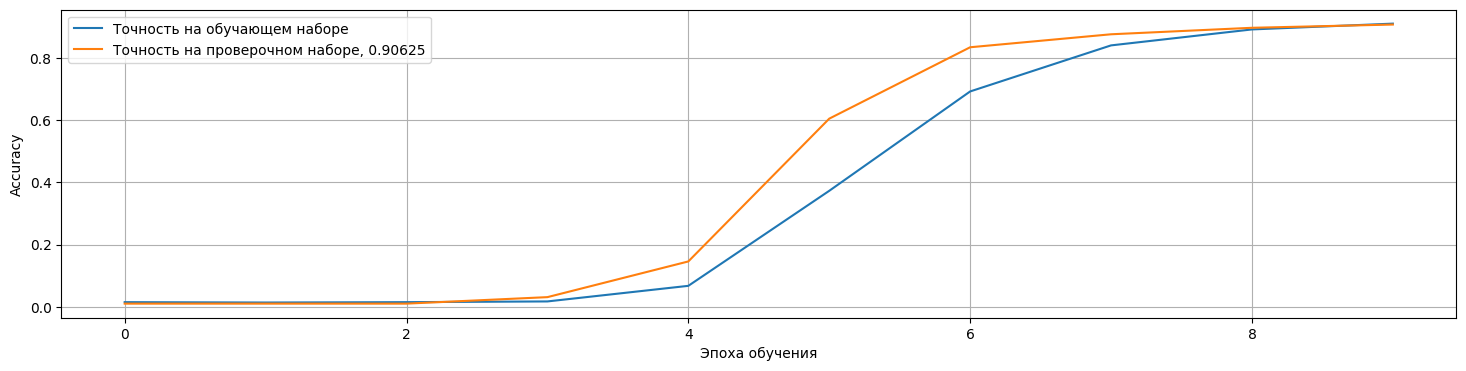

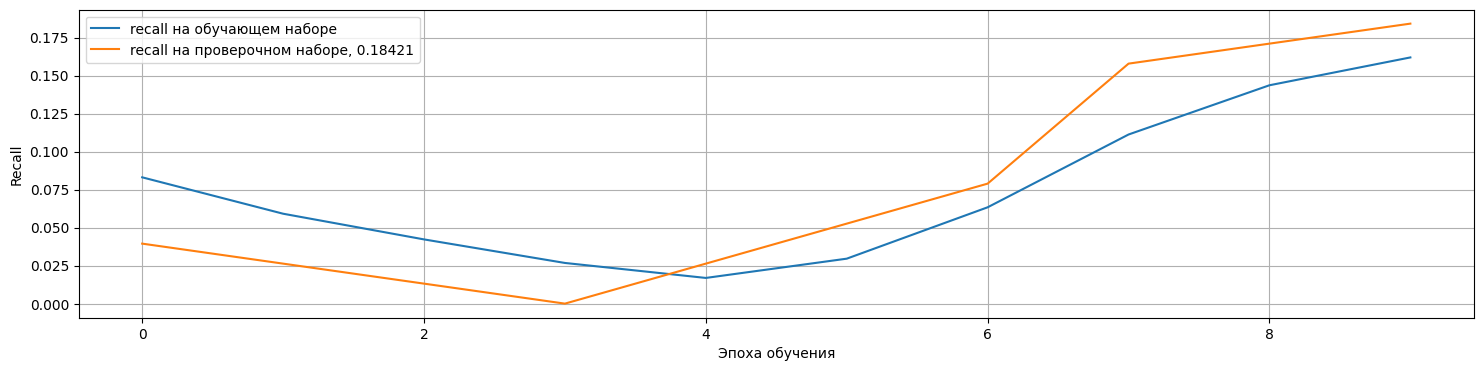

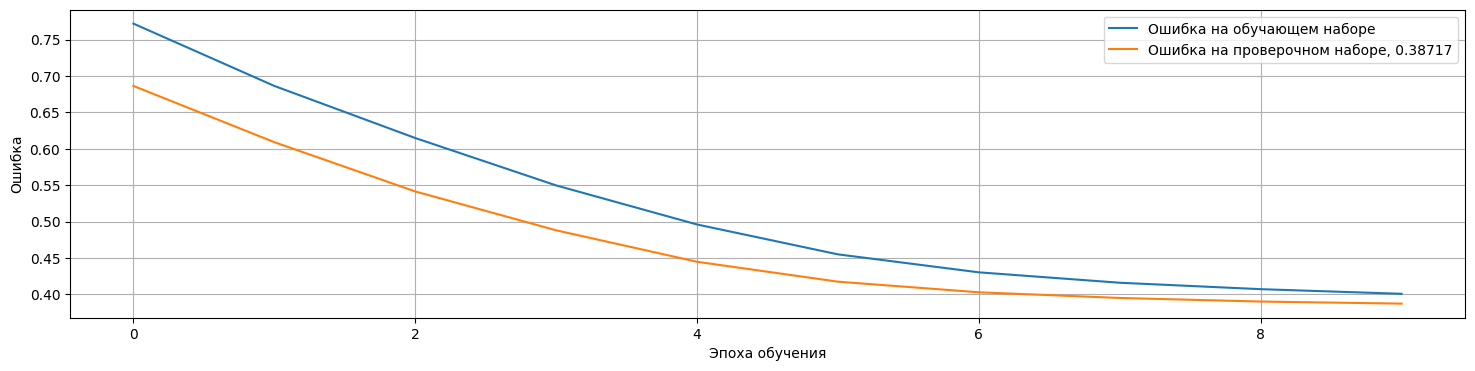

In [ ]:
# Обучаем модель на обучающих данных

# Используем метод fit для обучения модели modelD на обучающих данных (x_train, y_train)
# Проходим по 10 эпохам, выводим информацию о процессе обучения (verbose=1)
# Обрабатываем данные пакетами размером 32 (batch_size=32)
# Проводим валидацию на валидационных данных (x_val, y_val)

history = modelD.fit(x_train, y_train,
                     epochs=10,
                     verbose=1,
                     batch_size=32,
                     validation_data=(x_val, y_val))

# Создаем и отображаем графики метрик процесса обучения
pltFigureAccur(history)
pltFigureRecall(history)
pltFigureLoss(history)


In [ ]:
# Проверка ошибок на валидационных данных

# Инициализируем переменную для счетчика ошибок
errors = 0

# Проходим по 10 примерам из валидационных данных
for i in range(10):
    # Выполняем предсказание модели на i-м примере и преобразуем в бинарные значения
    pred = (np.squeeze(modelD.predict(x_val[i].reshape(1, -1), verbose=0)) > 0.5).astype(int)

    # Вычисляем абсолютную разницу между истинными значениями и предсказанными значениями
    err = abs(np.add.reduce(y_val[i] - pred))

    # Увеличиваем счетчик ошибок
    errors += err

    # Выводим информацию о примере, истинных и предсказанных значениях, а также ошибках
    print(f"В примере {i}, истинные значения:", y_val[i], ", а предсказанные:", pred, ", ошибок:", err)

# Выводим общее количество ошибок
print("Всего ошибок:", errors)


В примере 0, истинные значения: [0 0 0 0 1] , а предсказанные: [0 0 0 0 0] , ошибок: 1
В примере 1, истинные значения: [0 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 0
В примере 2, истинные значения: [1 0 0 0 1] , а предсказанные: [0 0 0 0 0] , ошибок: 2
В примере 3, истинные значения: [1 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 1
В примере 4, истинные значения: [0 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 0
В примере 5, истинные значения: [0 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 0
В примере 6, истинные значения: [0 0 0 0 0] , а предсказанные: [1 0 0 0 0] , ошибок: 1
В примере 7, истинные значения: [0 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 0
В примере 8, истинные значения: [0 1 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 1
В примере 9, истинные значения: [0 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 0
Всего ошибок: 6


## Эксперимент 2

In [ ]:
# Создание модели нейронной сети с более глубокой архитектурой

# Инициализация пустой последовательной модели
modelD = Sequential()

# Добавление слоев к модели
# Первый слой с 2048 нейронами и активацией ReLU, входные данные - размерность x_train
modelD.add(Dense(2048, input_dim=x_train.shape[1], activation='relu'))

# Второй слой с 256 нейронами и активацией ReLU
modelD.add(Dense(256, activation='relu'))

# Третий слой с 128 нейронами и активацией ReLU
modelD.add(Dense(128, activation='relu'))

# Четвертый слой с 32 нейронами и активацией ReLU
modelD.add(Dense(32, activation='relu'))

# Пятый слой (выходной) с 5 нейронами и активацией sigmoid (так как у нас 5 целевых переменных)
modelD.add(Dense(5, activation='sigmoid'))

# Компиляция модели
# Используем функцию потерь binary_crossentropy, оптимизатор Adam с заданной скоростью обучения,
# и метрики accuracy (точность) и Recall (полнота) для оценки производительности модели
modelD.compile(loss='binary_crossentropy',
               optimizer=Adam(learning_rate=0.0001),
               metrics=['accuracy', Recall(name='recall')])

# Вывод информации о модели
modelD.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              67584     
                                                                 
 dense_1 (Dense)             (None, 256)               524544    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 5)                 165       
                                                                 
Total params: 629,317
Trainable params: 629,317
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
27/27 [==============================] - 2s 22ms/step - loss: 0.4788 - accuracy: 0.5716 - recall: 0.0552 - val_loss: 0.4389 - val_accuracy: 0.9062 - val_recall: 0.0000e+00
Epoch 2/10
27/27 [==============================] - 0s 13ms/step - loss: 0.3966 - accuracy: 0.9360 - recall: 0.1952 - val_loss: 0.4174 - val_accuracy: 0.9062 - val_recall: 0.0000e+00
Epoch 3/10
27/27 [==============================] - 0s 12ms/step - loss: 0.3799 - accuracy: 0.9360 - recall: 0.1146 - val_loss: 0.4045 - val_accuracy: 0.9062 - val_recall: 0.3165
Epoch 4/10
27/27 [==============================] - 0s 13ms/step - loss: 0.3693 - accuracy: 0.9360 - recall: 0.2617 - val_loss: 0.3918 - val_accuracy: 0.9062 - val_recall: 0.0380
Epoch 5/10
27/27 [==============================] - 0s 13ms/step - loss: 0.3623 - accuracy: 0.9360 - recall: 0.2405 - val_loss: 0.3913 - val_accuracy: 0.9062 - val_recall: 0.0127
Epoch 6/10
27/27 [==============================] - 0s 12ms/step - loss: 0.3560 - accuracy: 0.936

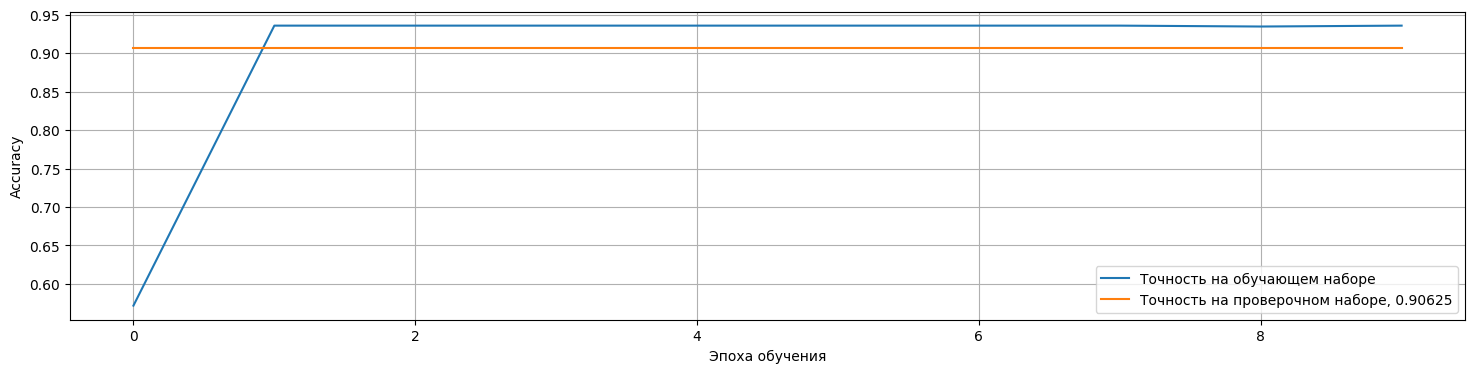

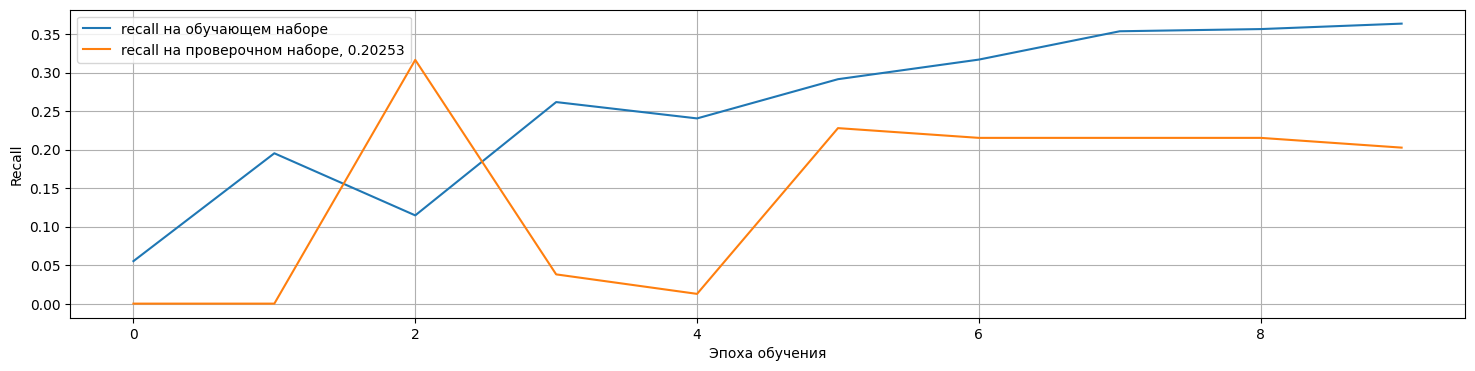

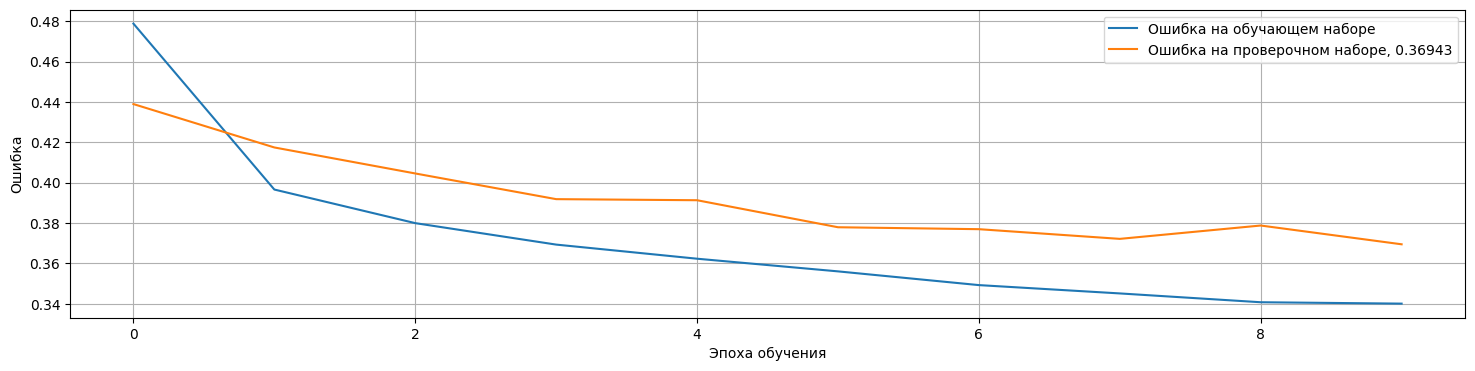

In [ ]:
# Обучаем модель на обучающих данных

# Используем метод fit для обучения модели modelD на обучающих данных (x_train, y_train)
# Проходим по 10 эпохам, выводим информацию о процессе обучения (verbose=1)
# Обрабатываем данные пакетами размером 32 (batch_size=32)
# Проводим валидацию на валидационных данных (x_val, y_val)

history = modelD.fit(x_train, y_train,
                     epochs=10,
                     verbose=1,
                     batch_size=32,
                     validation_data=(x_val, y_val))

# Создаем и отображаем графики метрик процесса обучения
pltFigureAccur(history)
pltFigureRecall(history)
pltFigureLoss(history)


In [ ]:
# Проверка ошибок на валидационных данных

# Инициализируем переменную для счетчика ошибок
errors = 0

# Проходим по 10 примерам из валидационных данных
for i in range(10):
    # Выполняем предсказание модели на i-м примере и преобразуем в бинарные значения
    pred = (np.squeeze(modelD.predict(x_val[i].reshape(1, -1), verbose=0)) > 0.5).astype(int)

    # Вычисляем абсолютную разницу между истинными значениями и предсказанными значениями
    err = abs(np.add.reduce(y_val[i] - pred))

    # Увеличиваем счетчик ошибок
    errors += err

    # Выводим информацию о примере, истинных и предсказанных значениях, а также ошибках
    print(f"В примере {i}, истинные значения:", y_val[i], ", а предсказанные:", pred, ", ошибок:", err)

# Выводим общее количество ошибок
print("Всего ошибок:", errors)


В примере 0, истинные значения: [0 0 0 0 1] , а предсказанные: [0 0 0 0 0] , ошибок: 1
В примере 1, истинные значения: [0 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 0
В примере 2, истинные значения: [1 0 0 0 1] , а предсказанные: [0 0 0 0 0] , ошибок: 2
В примере 3, истинные значения: [1 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 1
В примере 4, истинные значения: [0 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 0
В примере 5, истинные значения: [0 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 0
В примере 6, истинные значения: [0 0 0 0 0] , а предсказанные: [1 0 0 0 0] , ошибок: 1
В примере 7, истинные значения: [0 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 0
В примере 8, истинные значения: [0 1 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 1
В примере 9, истинные значения: [0 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 0
Всего ошибок: 6


## Эксперимент 3

In [ ]:
# Создаем модель нейронной сети

# Инициализируем пустую последовательную модель
modelD = Sequential()

# Добавляем слои к модели
# Первый слой с размером 32 и активацией ReLU, входные данные - размерность x_train
modelD.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))

# Добавляем второй слой с размером 32 и активацией ReLU
modelD.add(Dense(32, activation='relu'))

# Добавляем третий слой с Dropout
modelD.add(Dropout(0.3))

# Добавляем выходной слой с размером 5 (поскольку у нас 5 целевых переменных) и активацией sigmoid
modelD.add(Dense(5, activation='sigmoid'))

# Компилируем модель
# Используем функцию потерь binary_crossentropy, оптимизатор Adam с заданной скоростью обучения,
# и метрики accuracy (точность) и Recall (полнота) для оценки производительности модели
modelD.compile(loss='binary_crossentropy',
               optimizer=Adam(learning_rate=0.0001),
               metrics=['accuracy', Recall(name='recall')])

# Выводим информацию о модели
modelD.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 5)                 165       
                                                                 
Total params: 2,277
Trainable params: 2,277
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
27/27 [==============================] - 1s 11ms/step - loss: 1.3260 - accuracy: 0.2864 - recall: 0.5149 - val_loss: 0.7744 - val_accuracy: 0.3542 - val_recall: 0.6329
Epoch 2/30
27/27 [==============================] - 0s 4ms/step - loss: 1.1249 - accuracy: 0.3423 - recall: 0.5064 - val_loss: 0.6471 - val_accuracy: 0.3854 - val_recall: 0.5823
Epoch 3/30
27/27 [==============================] - 0s 4ms/step - loss: 1.0453 - accuracy: 0.3818 - recall: 0.4356 - val_loss: 0.5598 - val_accuracy: 0.4688 - val_recall: 0.5443
Epoch 4/30
27/27 [==============================] - 0s 4ms/step - loss: 0.8923 - accuracy: 0.4191 - recall: 0.4498 - val_loss: 0.5060 - val_accuracy: 0.6042 - val_recall: 0.4051
Epoch 5/30
27/27 [==============================] - 0s 4ms/step - loss: 0.8398 - accuracy: 0.4377 - recall: 0.4314 - val_loss: 0.4749 - val_accuracy: 0.7396 - val_recall: 0.3544
Epoch 6/30
27/27 [==============================] - 0s 4ms/step - loss: 0.8005 - accuracy: 0.4983 - recall: 0

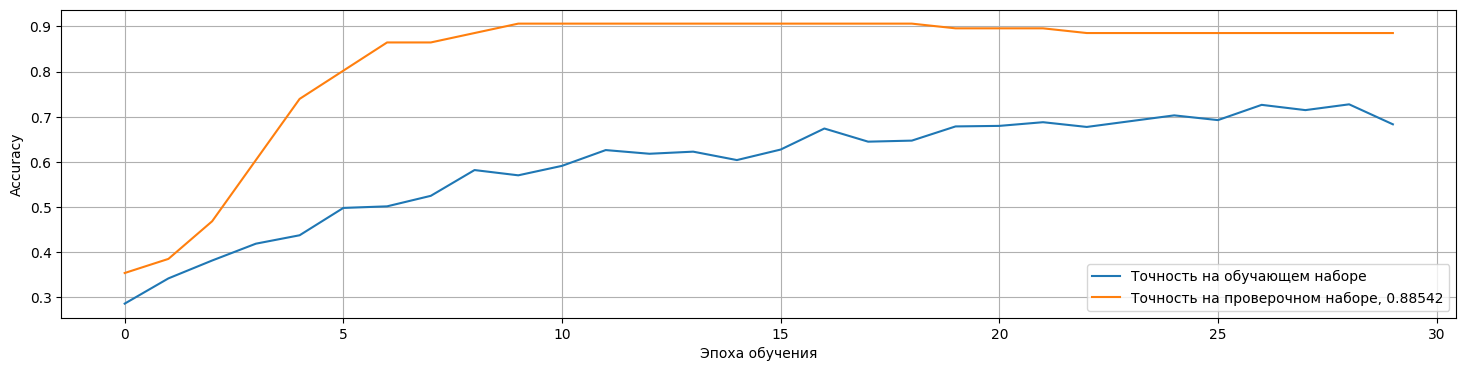

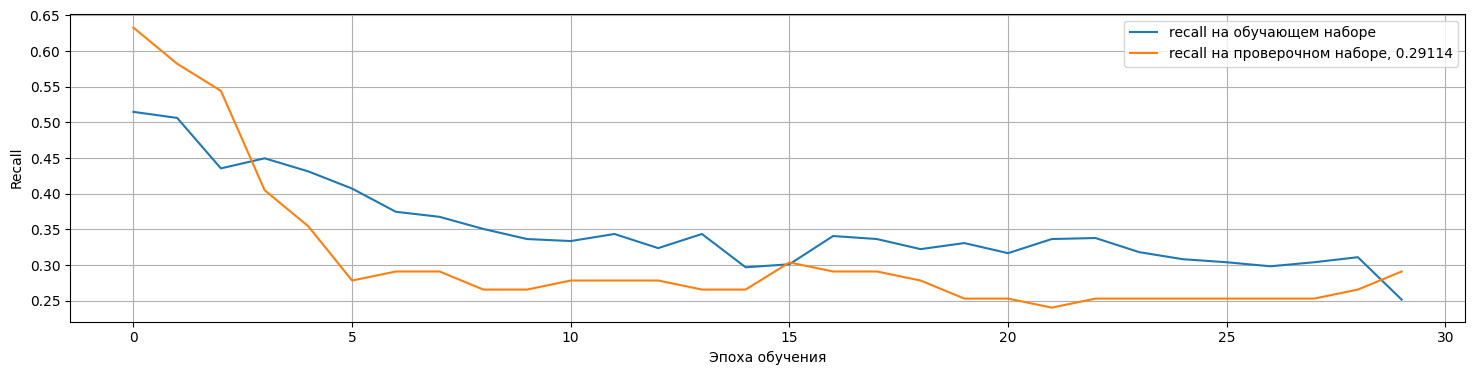

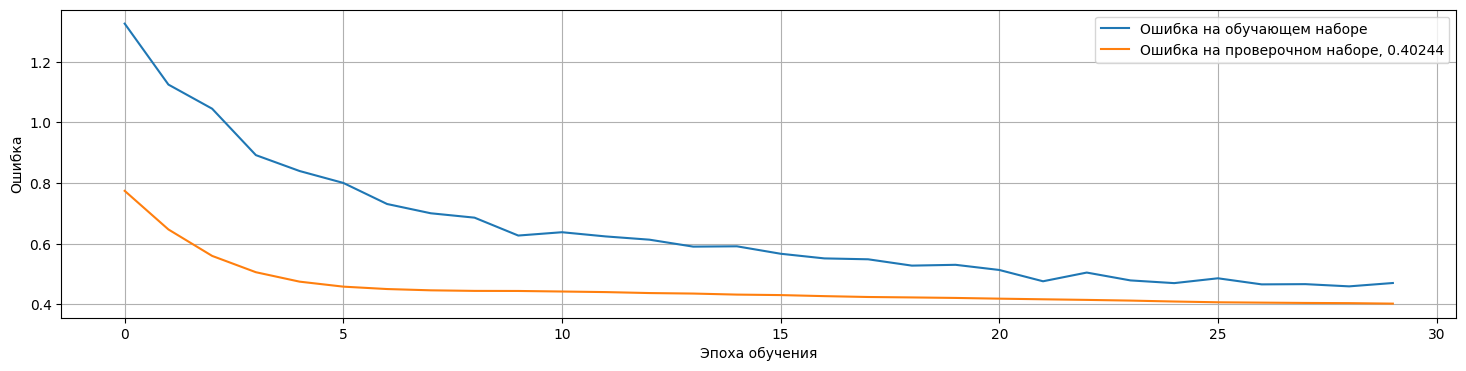

In [ ]:
# Обучаем модель на обучающих данных

# Используем метод fit для обучения модели modelD на обучающих данных (x_train, y_train)
# Проходим по 10 эпохам, выводим информацию о процессе обучения (verbose=1)
# Обрабатываем данные пакетами размером 32 (batch_size=32)
# Проводим валидацию на валидационных данных (x_val, y_val)

history = modelD.fit(x_train, y_train,
                     epochs=30,
                     verbose=1,
                     batch_size=32,
                     validation_data=(x_val, y_val))

# Создаем и отображаем графики метрик процесса обучения
pltFigureAccur(history)
pltFigureRecall(history)
pltFigureLoss(history)


In [ ]:
# Проверка ошибок на валидационных данных

# Инициализируем переменную для счетчика ошибок
errors = 0

# Проходим по 20 примерам из валидационных данных
for i in range(20):
    # Выполняем предсказание модели на i-м примере и преобразуем в бинарные значения
    pred = (np.squeeze(modelD.predict(x_val[i].reshape(1, -1), verbose=0)) > 0.5).astype(int)

    # Вычисляем абсолютную разницу между истинными значениями и предсказанными значениями
    err = abs(np.add.reduce(y_val[i] - pred))

    # Увеличиваем счетчик ошибок
    errors += err

    # Выводим информацию о примере, истинных и предсказанных значениях, а также ошибках
    print(f"В примере {i}, истинные значения:", y_val[i], ", а предсказанные:", pred, ", ошибок:", err)

# Выводим общее количество ошибок
print("Всего ошибок:", errors)


В примере 0, истинные значения: [0 0 0 0 1] , а предсказанные: [0 0 0 0 0] , ошибок: 1
В примере 1, истинные значения: [0 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 0
В примере 2, истинные значения: [1 0 0 0 1] , а предсказанные: [0 0 0 0 0] , ошибок: 2
В примере 3, истинные значения: [1 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 1
В примере 4, истинные значения: [0 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 0
В примере 5, истинные значения: [0 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 0
В примере 6, истинные значения: [0 0 0 0 0] , а предсказанные: [1 0 0 0 0] , ошибок: 1
В примере 7, истинные значения: [0 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 0
В примере 8, истинные значения: [0 1 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 1
В примере 9, истинные значения: [0 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 0
В примере 10, истинные значения: [0 0 0 0 0] , а предсказанные: [0 0 0 0 0] , ошибок: 0
В примере 11, истинные значения: [1 0 0 0 

# ДЗ Лайт

Перепешите код ноутбука собственноручно и выполните его без ошибок

In [ ]:
# Ваше решение


# ДЗ Про 1

Создайте нейронную сеть с использованием Функционального API с параллельной обработкой входных данных разными слоями

In [ ]:
# Ваше решение

# ДЗ Про 2

Добейтесь метрики Recall выше 0.7

In [ ]:
# Ваше решение

# ДЗ Про 3

Выполните задание с использованием библиотеки Autokeras

In [ ]:
# Ваше решение